In [1691]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [1692]:
df = pd.read_csv('records.csv')

In [1693]:
def plot_t_days(time):
    for i in range(100):
        if df.iloc[i][1]==-1:
            plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
        else:
            if time<df.iloc[i][1]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='black', facecolors='none')
            elif df.iloc[i][1]<=time<df.iloc[i][2]:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='red', facecolors='red')
            else:
                plt.scatter(x[i], y[i], marker = "o", s = 50, edgecolors='blue', facecolors='blue')
    plt.show()

In [1694]:
x = df["position_x"]
y = df["position_y"]

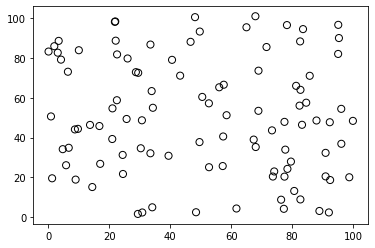

In [1695]:
#Each individuals' location before the outbreak
plt.scatter(x, y, marker = "o", s = 50, edgecolors='black', facecolors='none')
plt.show()

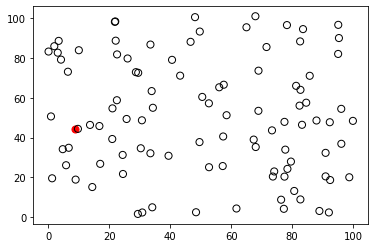

In [1696]:
#t day after the outbreak
#compare with epiILM
#cran fortran 
plot_t_days(0)

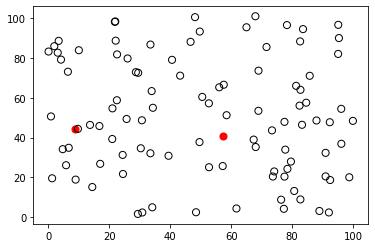

In [1697]:
plot_t_days(1)

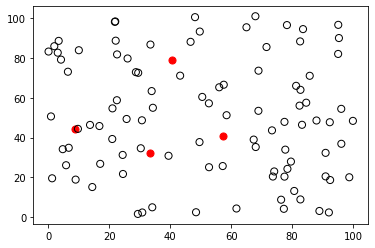

In [1698]:
plot_t_days(2)

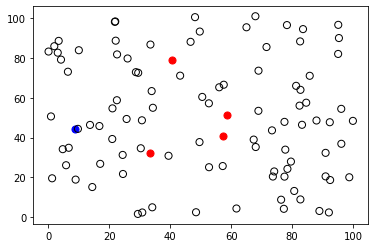

In [1699]:
plot_t_days(3)

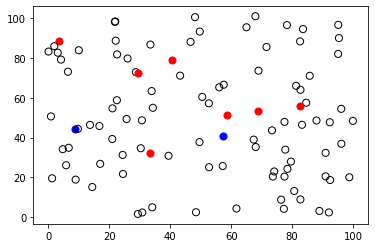

In [1700]:
plot_t_days(4)

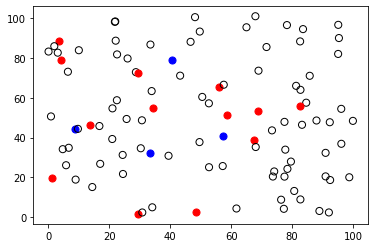

In [1701]:
plot_t_days(5)

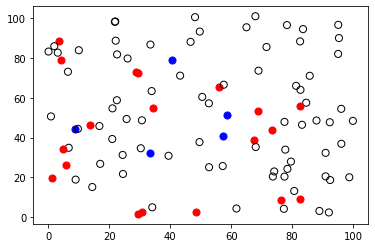

In [1702]:
plot_t_days(6)

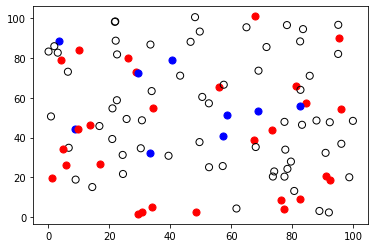

In [1703]:
plot_t_days(7)

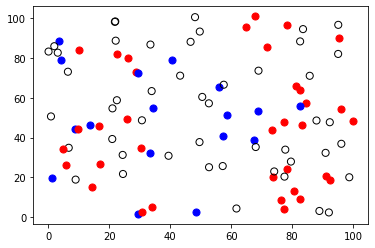

In [1704]:
plot_t_days(8)

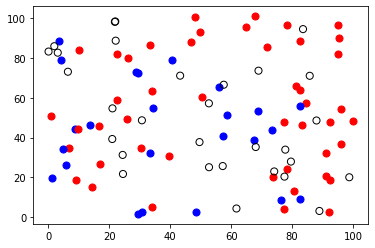

In [1705]:
plot_t_days(9)

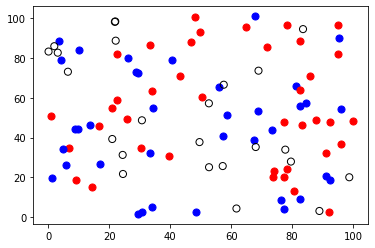

In [1706]:
plot_t_days(10)

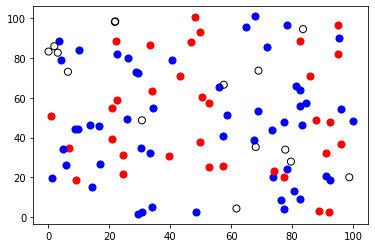

In [1707]:
plot_t_days(11)

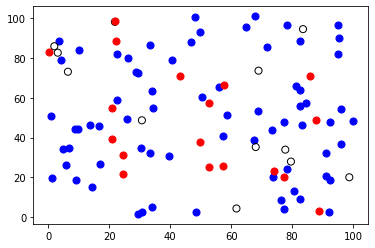

In [1708]:
plot_t_days(12)

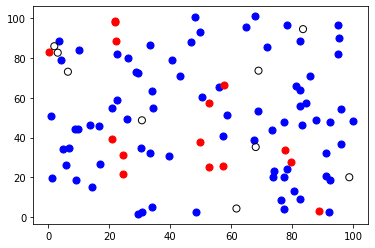

In [1709]:
plot_t_days(13)

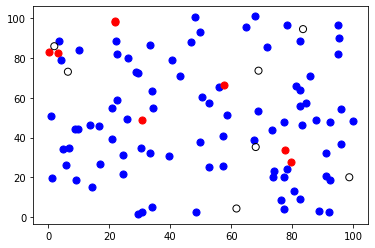

In [1710]:
plot_t_days(14)

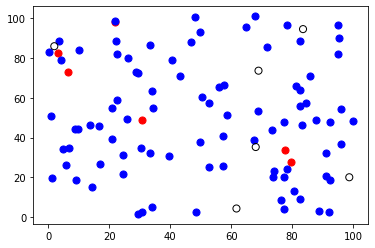

In [1711]:
plot_t_days(15)

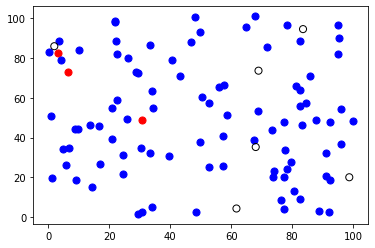

In [1712]:
plot_t_days(16)

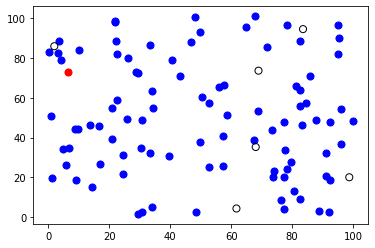

In [1713]:
plot_t_days(17)

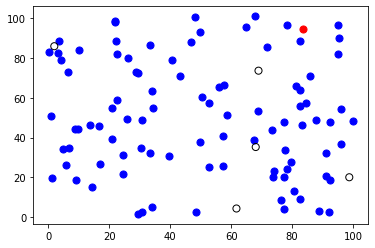

In [1714]:
plot_t_days(18)

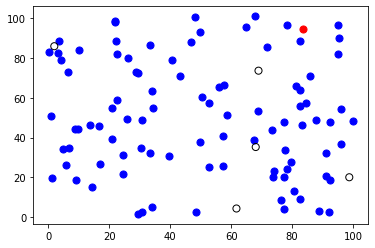

In [1715]:
plot_t_days(19)

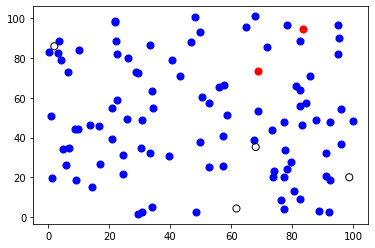

In [1716]:
plot_t_days(20)

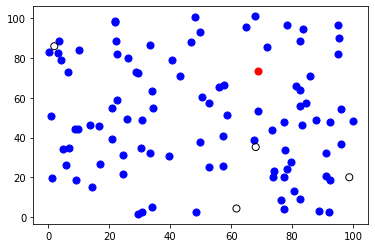

In [1717]:
plot_t_days(21)

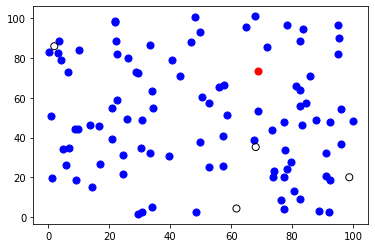

In [1718]:
plot_t_days(22)

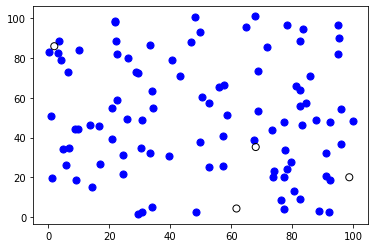

In [1719]:
plot_t_days(23)

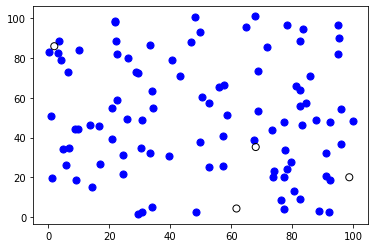

In [1720]:
plot_t_days(24)

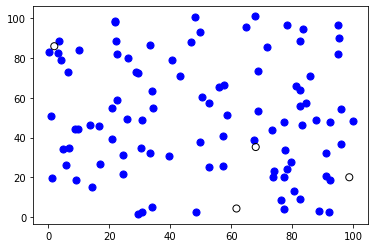

In [1721]:
plot_t_days(25)

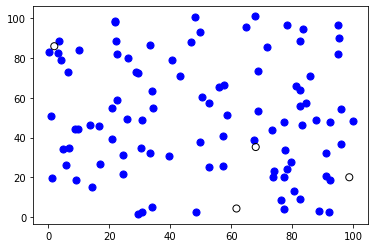

In [1722]:
plot_t_days(26)

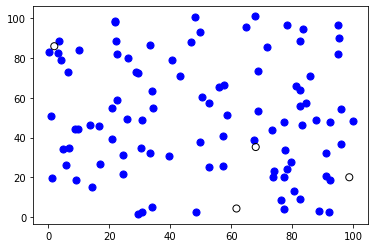

In [1723]:
plot_t_days(27)

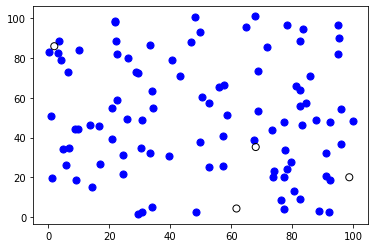

In [1724]:
plot_t_days(28)

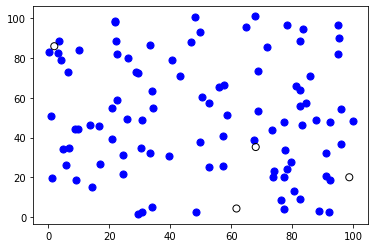

In [1725]:
plot_t_days(29)

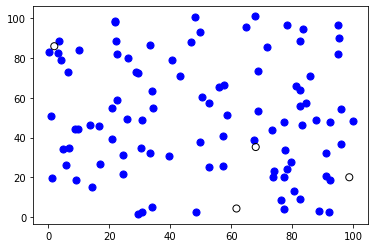

In [1726]:
plot_t_days(30)

In [1149]:
#email update cancel next 2 weeks;7-17 9am


In [1518]:
samples = pd.read_csv('samples.csv')

In [1519]:
samples_a0 = samples["a0"]
samples_a1 = samples["a1"]
samples_n1 = samples["n1"]

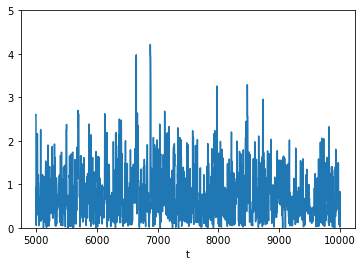

In [1520]:
times = range(4999,10000)
plt.plot(times, samples_a0[4999:10000])
plt.ylim(0, 5)
plt.xlabel("t")
plt.ylabel("")
plt.show()
#plt.savefig("mixturemodel_beta11")

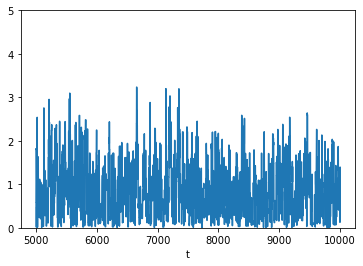

In [1521]:
times = range(4999,10000)
plt.plot(times, samples_a1[4999:10000])
plt.ylim(0, 5)
plt.xlabel("t")
plt.ylabel("")
plt.show()

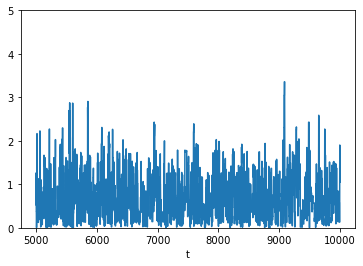

In [1522]:
times = range(4999,10000)
plt.plot(times, samples_n1[4999:10000])
plt.ylim(0, 5)
plt.xlabel("t")
plt.ylabel("")
plt.show()

In [1523]:
np.mean(samples_a0[4999:10000])

0.7736223724943011

In [1524]:
np.mean(samples_a1[4999:10000])

0.8570309784363132

In [1525]:
np.mean(samples_n1[4999:10000])

0.7101996440711836

In [1733]:
a0 = pd.read_csv('samples_a0.csv')

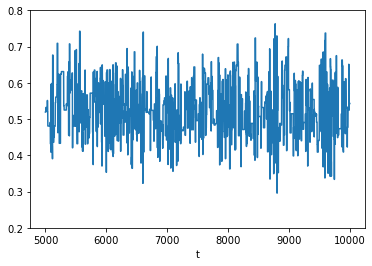

In [1734]:
samples_a0 = a0["a0"]
times = range(4999,10000)
plt.plot(times, samples_a0[4999:10000])
plt.ylim(0.2, 0.8)
plt.xlabel("t")
plt.ylabel("")
plt.show()

In [1735]:
np.mean(samples_a0[4999:10000])

0.5272063595280934